In [279]:
# Common Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [269]:
# Cleaned dataframe of continous values I think are good to use
continous_df = pd.read_csv('/Users/aidancurley/Documents/dsir/Submissions/Projects/project_2-master/continous_df.csv')

In [382]:
# Training data
train_df = pd.read_csv('/Users/aidancurley/Documents/dsir/Submissions/Projects/project_2-master/datasets/train.csv')

In [951]:
# Testing data
test_df = pd.read_csv('/Users/aidancurley/Documents/dsir/Submissions/Projects/project_2-master/datasets/test.csv')

# Continous ML Model

In [1076]:
# Only continous features
continous_df.head()

,Id,Lot Frontage,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area,SalePrice
0,109,69.0552,533.0,725.0,725,1479,475.0,130500
1,544,43.0000,637.0,913.0,913,2122,559.0,220000
2,153,68.0000,731.0,1057.0,1057,1057,246.0,109000
3,318,73.0000,0.0,384.0,744,1444,400.0,174000
4,255,82.0000,0.0,676.0,831,1445,484.0,138500


In [1077]:
# Features for X
cont_col = ['Lot Frontage', 'BsmtFin SF 1', 'Total Bsmt SF', 'Gr Liv Area', 'Garage Area']

In [1078]:
# Set X and y for model
X = continous_df[cont_col]
y = continous_df['SalePrice']

In [1079]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6, test_size=.90)
X_train.head()

,Lot Frontage,BsmtFin SF 1,Total Bsmt SF,Gr Liv Area,Garage Area
1920,120.0,130.0,680.0,1174,576.0
1507,75.0,468.0,1000.0,1609,305.0
144,57.0,1032.0,1642.0,1418,852.0
1439,60.0,0.0,931.0,1027,0.0
1069,60.0,0.0,938.0,2299,482.0


In [1080]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1081]:
model.score(X_train, y_train)

0.7388595527715172

In [1086]:
# Training MSE
print(f"Training MSE is {mean_squared_error(y_train, model.predict(X_train), squared=False)}")

# Testing MSE
print(f"Testing MSE is {mean_squared_error(y_test, model.predict(X_test), squared=False)}")

Training MSE is 40260.635329322075
Testing MSE is 46462.90993627991


In [1056]:
pred_df = test_df[['Id']]

In [1087]:
test_df.head(1)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD


In [1088]:
y_pred = model.predict(X_train)
y_pred[:4]

array([146905.09126563, 176872.65796453, 239834.14725414,  95016.36660547])

In [1089]:
y_intercept = model.intercept_

In [1090]:
y_coef = model.coef_

In [162]:
test_df['Lot Frontage'].fillna(np.mean(test_df['Lot Frontage']), inplace=True)

In [163]:
test_df['BsmtFin SF 1'].fillna(np.mean(test_df['BsmtFin SF 1']), inplace=True)

In [164]:
test_df['Total Bsmt SF'].fillna(np.mean(test_df['Total Bsmt SF']), inplace = True)

In [165]:
test_df['Garage Area'].fillna(np.mean(test_df['Garage Area']), inplace = True)

# Nominal(Categorical) ML Model

In [1092]:
# Dataframe with all the get dummied columns
nominal_df = pd.read_csv('/Users/aidancurley/Documents/dsir/Submissions/Projects/project_2-master/nominal_df.csv')

In [1093]:
nominal_df.head(1)

,Id,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,MS SubClass_30,MS SubClass_40,MS SubClass_45,...,Heating_Wall,Central Air_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [1097]:
# Add 'SalePrice' and 'Id' to nominal_df
sale_train = train_df[['SalePrice', 'Id']]
sale_train.head(1)

,SalePrice,Id
0,130500,109


In [1098]:
# Adding 'SalePrice' and 'Id' to nominal_df
sale_nominal = nominal_df.merge(sale_train, on='Id')

In [1100]:
# Added
sale_nominal['SalePrice']

0       130500
1       220000
2       109000
3       174000
4       138500
         ...  
2046    298751
2047     82500
2048    177000
2049    144000
2050    189000
Name: SalePrice, Length: 2051, dtype: int64

<AxesSubplot:>

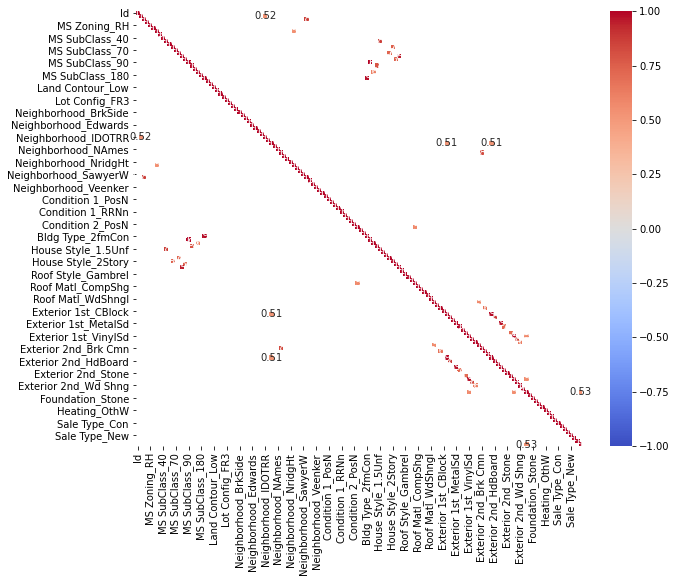

In [1101]:
# Heatmap showing correlation between columns
corr = sale_nominal.corr()
plt.figure(figsize=(10,8))

sns.heatmap(corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1, mask=sale_nominal.corr()<0.5)

In [1102]:
nom_df = nominal_df.drop(columns='Id')

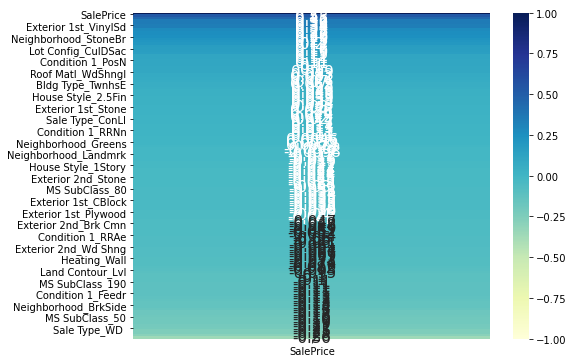

In [1103]:
plt.figure(figsize=(8,6))
sns.heatmap(sale_nominal.corr()[['SalePrice']].sort_values(by="SalePrice",
       ascending=False),
           annot=True,
           cmap='YlGnBu',
           annot_kws={'fontsize':15},
           vmin=-1, vmax=1, );

In [1104]:
# Top correlated columns
corcol = ['Exterior 1st_VinylSd', 'Neighborhood_StoneBr', 'Lot Config_CulDSac']

In [1105]:
corcolumns = sale_nominal[corcol]

In [1108]:
# Dataframe with just 'Exterior 1st_VinylSd', 'Neighborhood_StoneBr' and 'Lot Config_CulDSac'
corcolumns.head(1)

,Exterior 1st_VinylSd,Neighborhood_StoneBr,Lot Config_CulDSac
0,0,0,1


In [1115]:
# X is the above dataframe, y is the saleprice
X = corcolumns
y = sale_train['SalePrice']

In [1116]:
X.shape

(2051, 3)

In [1117]:
y.shape

(2051,)

In [1118]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, random_state = 42, train_size = .20)

In [1119]:
model2 = LinearRegression()

In [1120]:
model2.fit(X_train_2, y_train_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1121]:
y_pred_train_2 = model2.predict(X_train_2)

In [1127]:
y_pred_test_2 = model2.predict(X_test_2)
y_pred_test_2

array([155237.98400102, 155237.98400102, 208649.95748893, ...,
       155237.98400102, 155237.98400102, 208649.95748893])

In [1128]:
# The MSE for these features predicting y
print(f"MSE for train is {mean_squared_error(y_train_2, y_pred_train_2, squared=False)}")

print(f"MSE for test is {mean_squared_error(y_test_2, y_pred_test_2, squared=False)}")

MSE for train is 70320.05778268863
MSE for test is 71197.77637635998


In [551]:
continous_df.head(1)

,Id,Lot Frontage,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area,SalePrice
0,109,69.0552,533.0,725.0,725,1479,475.0,130500


In [1158]:
# Creating new dataframe of the the categorical features I want to use
categorical_df = nominal_df[['Id', 'Exterior 1st_VinylSd', 'Lot Config_CulDSac']]

In [1159]:
# Merging the continous with the categorical feautres
cleaned_df = continous_df.merge(categorical_df, on='Id')

In [1160]:
# This dataframe has nominal and catgegorical values
cleaned_df.head(1)

,Id,Lot Frontage,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area,SalePrice,Exterior 1st_VinylSd,Lot Config_CulDSac
0,109,69.0552,533.0,725.0,725,1479,475.0,130500,0,1


In [1161]:
cleaned_df.to_csv('cleaned_df.csv', index=False)

# ML Model Categorical & Continous

In [1162]:
clean_cont_cats = pd.read_csv('../project_2-master/cleaned_df.csv')

In [1164]:
clean_cont_cats.head(1)

,Id,Lot Frontage,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area,SalePrice,Exterior 1st_VinylSd,Lot Config_CulDSac
0,109,69.0552,533.0,725.0,725,1479,475.0,130500,0,1


In [1166]:
# Getting dummies for the 'Neighborhood' column
neigh_dummies = train_df[['Id','Neighborhood']]
neigh_new = pd.get_dummies(columns=['Neighborhood'], data=neigh_dummies, drop_first=True)
neigh_new.head(1)

,Id,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,109,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [1175]:
# Merging the clean continous and nominal features with the neighborhood columns
model_df = clean_cont_cats.merge(neigh_new, on='Id')

In [1176]:
model_df.head(1)

,Id,Lot Frontage,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area,SalePrice,Exterior 1st_VinylSd,Lot Config_CulDSac,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,109,69.0552,533.0,725.0,725,1479,475.0,130500,0,1,...,0,0,0,0,1,0,0,0,0,0


In [1177]:
# Dropping the 'Id' column...might got back and set as index
model_df.drop(columns=['Id'], inplace=True)

In [1179]:
# 'Id' not there anymore
model_df.head(1)

,Lot Frontage,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area,SalePrice,Exterior 1st_VinylSd,Lot Config_CulDSac,Neighborhood_Blueste,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,69.0552,533.0,725.0,725,1479,475.0,130500,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [1184]:
# Move 'SalePrice' to the end of the dataframe easier to exlude in feature selection
df1 = model_df.pop('SalePrice')
model_df['SalePrice']=df1

In [1185]:
model_df.head(1)

,Lot Frontage,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area,Exterior 1st_VinylSd,Lot Config_CulDSac,Neighborhood_Blueste,Neighborhood_BrDale,...,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,SalePrice
0,69.0552,533.0,725.0,725,1479,475.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,130500


In [1187]:
model_df.columns[:-1]

Index(['Lot Frontage', 'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF',
       'Gr Liv Area', 'Garage Area', 'Exterior 1st_VinylSd',
       'Lot Config_CulDSac', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_Greens', 'Neighborhood_GrnHill', 'Neighborhood_IDOTRR',
       'Neighborhood_Landmrk', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker'],
      dtype='object')

In [1277]:
X = cont_cats[model_df.columns[:-1]]
y = cont_cats['SalePrice_y']

In [1278]:
X.shape

(2051, 35)

In [1280]:
X.head(1)

,Lot Frontage,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area,Exterior 1st_VinylSd,Lot Config_CulDSac,Neighborhood_Blueste,Neighborhood_BrDale,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,69.0552,533.0,725.0,725,1479,475.0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [1281]:
y.shape

(2051,)

In [1282]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, random_state = 42, train_size=.70)

model3 = LinearRegression()

model3.fit(X_train_3, y_train_3)

y_pred_train_3 = model3.predict(X_train_3)
y_pred_test_3 = model3.predict(X_test_3)

y_intercept = model3.intercept_
y_coef = model3.coef_

print(f"MSE for train is {mean_squared_error(y_train_3, y_pred_train_3, squared=False)}")

print(f"MSE for test is {mean_squared_error(y_test_3, y_pred_test_3, squared=False)}")

MSE for train is 36606.236753316116
MSE for test is 33295.81633731802


In [1283]:
test_df.head(1)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD


In [1284]:
# Get dummy columns for the 'Neighborhood' column in the 'test_csv'
neigh_dum_test = test_df[['Id','Neighborhood']]
dummy_test_neigh = pd.get_dummies(columns=['Neighborhood'], data=neigh_dum_test, drop_first=True)

dummy_test_neigh.head(2)

,Id,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,2658,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2718,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [1285]:
# Reading in the categorical columns from test_csv
nominal_test = pd.read_csv('../project_2-master/nominal_test.csv')

In [1286]:
nominal_test.head(1)

,Id,MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,...,Central Air_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,2658,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [1287]:
# Reading in the contionus columns from test_csv
test_continous = pd.read_csv('../project_2-master/test_contionus.csv')

In [1288]:
test_continous.head(1)

,Id,Lot Frontage,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area
0,2658,69.0,0,1020,908,1928,440


In [1289]:
# Creating a new dataframe with only the categorical features I wanted
categorical_test = nominal_test[['Id', 'Exterior 1st_VinylSd', 'Lot Config_CulDSac']]

In [1290]:
# Creates a new dataframe with the continous and categorical features I want
cats_conts_test = categorical_test.merge(test_continous, on='Id')

In [1291]:
# Categorical and Continous features
cats_conts_test.head(1)

,Id,Exterior 1st_VinylSd,Lot Config_CulDSac,Lot Frontage,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area
0,2658,0,0,69.0,0,1020,908,1928,440


In [1292]:
# Merges the Categorical features and Continous features with all of the dummy columns
kaggle_submission = cats_conts_test.merge(dummy_test_neigh, on='Id')

In [1293]:
kaggle_submission.head(1)

,Id,Exterior 1st_VinylSd,Lot Config_CulDSac,Lot Frontage,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area,Neighborhood_Blueste,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,2658,0,0,69.0,0,1020,908,1928,440,0,...,0,0,1,0,0,0,0,0,0,0


In [1294]:
kaggle_submission.set_index('Id', inplace = True)

In [1295]:
X.shape

(2051, 35)

In [1296]:
X.columns

Index(['Lot Frontage', 'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF',
       'Gr Liv Area', 'Garage Area', 'Exterior 1st_VinylSd',
       'Lot Config_CulDSac', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_Greens', 'Neighborhood_GrnHill', 'Neighborhood_IDOTRR',
       'Neighborhood_Landmrk', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker'],
      dtype='object')

In [1297]:
X.drop(columns=['Neighborhood_GrnHill', 'Neighborhood_Landmrk'], inplace = True)

/Users/aidancurley/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [1298]:
# Less columns than X
kaggle_submission.shape

(878, 33)

In [1299]:
# Now we have the same amount of columns
X.shape

(2051, 33)

In [1307]:
x_cols = X.columns

In [1308]:
subs_cols = kaggle_submission.columns

In [1312]:
# for n in x_cols:
#     for xi in subs_cols:
#         if xi not in x_cols:
#             print(xi)
#         else:
#             print("You're Good")

In [1300]:
# X is all of our features, y is saleprice
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, random_state = 42, train_size=.70)

model3 = LinearRegression()

model3.fit(X_train_3, y_train_3)

# print(mean_squared_error(y_test_3, y_pred_test_3, squared=False))
print(f"Train RMSE: {mean_squared_error(y_train_3, model3.predict(X_train_3))**0.5}")
print(f"Test RMSE: {mean_squared_error(y_test_3, model3.predict(X_test_3))**0.5}")

Train RMSE: 36824.959858509166
Test RMSE: 33271.84791905848


In [1301]:
model3.predict(X_train_3)

array([162547.81116894, 172329.00360757, 116948.50341394, ...,
       164066.09207036,  98022.23562917, 224364.50399211])

In [1302]:
model3.predict(kaggle_submission)

array([22281805.63680606, 25128641.74078936, 18794782.75811453,
       15750263.78750574, 19610905.05296044, 13265452.94552424,
       13700546.99888599, 14115752.80156328, 23037645.70905101,
       18018396.94143331, 17752473.66547209, 13510322.30818946,
       18367886.07836042, 35413924.89950894, 18053232.84926576,
       14548199.27917781, 25319939.76631615, 14113008.87741083,
       20810966.07578303, 20599532.66022389, 12812248.35569389,
       19353697.35206053, 21657612.61087495, 16984827.90849729,
       19360152.07985105, 12771282.71643864, 19617158.01961192,
       17451349.82080375, 16418069.26838513,  5112188.53483505,
       18475108.92785413, 18560983.43176537, 35050956.01359792,
       16668935.6883354 , 22018060.18892828, 18988758.58632126,
       15425714.29088938, 15590078.25722888, 14131621.73330573,
       21311409.71579422, 18536753.98790566, 21846586.37383617,
       20998241.63853913, 15424237.0553517 , 20447544.75924979,
       10200092.86062743, 24172178.18710

In [1256]:
# Predicts sale price on our test data 
kaggle_submission['SalePrice'] = model3.predict(kaggle_submission)

In [1257]:
kaggle_submission

,Exterior 1st_VinylSd,Lot Config_CulDSac,Lot Frontage,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area,Neighborhood_Blueste,Neighborhood_BrDale,...,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2658,0,0,69.0000,0,1020,908,1928,440,0,0,...,0,1,0,0,0,0,0,0,0,2.228181e+07
2718,0,0,69.0552,0,1967,1967,1967,580,0,0,...,0,0,0,1,0,0,0,0,0,2.512864e+07
2414,1,0,58.0000,554,654,664,1496,426,0,0,...,0,0,0,0,0,0,0,0,0,1.879478e+07
1989,0,0,60.0000,0,968,968,968,480,0,0,...,0,1,0,0,0,0,0,0,0,1.575026e+07
625,0,0,69.0552,609,1394,1394,1394,514,0,0,...,0,0,0,0,0,0,0,0,0,1.961091e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,0,0,80.0000,931,1084,1084,1877,488,0,0,...,0,0,0,0,0,0,0,0,0,2.277356e+07
1234,1,0,90.0000,575,1104,1104,1988,480,0,0,...,0,0,0,0,0,0,0,0,0,2.346109e+07
1373,0,0,55.0000,250,952,1211,1211,322,0,0,...,0,0,0,1,0,0,0,0,0,1.485570e+07


In [1258]:
output = kaggle_submission[['SalePrice']]

In [1259]:
output

,SalePrice
Id,
2658,2.228181e+07
2718,2.512864e+07
2414,1.879478e+07
1989,1.575026e+07
625,1.961091e+07
...,...
1662,2.277356e+07
1234,2.346109e+07
1373,1.485570e+07


In [839]:
output.to_csv('./datasets/second_submission.csv')